# AirBNB Sentiment Analysis

[Airbnb](https://www.airbnb.com/) is a popular online marketplace that connects people who rent their space to people who are looking for accomodations in that area

Customers can leave reviews for the rented space and sometimes bad ones can scare people away.

We'll analyze how's the review looks like, from Airbnb public data.

## Business Understanding

Bad review could turn customers away.

It's now common for a customer to do their own research before deciding a buy. 
Some aspects they like to compare are price, product review, brand, etc. 
During their own research, consumer able to look for positive or negative reviews.


A study founds that online reviews affect [67%](https://soundwave.co.uk/blog/study-finds-67-of-consumers-are-influenced-by-online-reviews) of consumer purchasing decision. 
Positive reviews would increase the reputation, and able to drive more sales. 
Meanwhile, negative reviews could be detrimental to business. Revenue Loss, Undermine brand image, drive away customer visit, and low search traffic.

Thus, it's essential for the business to find bad review and take action to improve the product/service

These are the questions that we wish to answer in this analysis : 
- How to identify positive and negative reviews? 
- What are the popular words from the customers? 
- How to detect negative reviews and does it robust enough to detect the sentiment?

## Data Understanding

The data taken from Airbnb for 3 cities (Boston, Seattle, Amsterdam)

- City : [Boston](https://www.kaggle.com/airbnb/boston), [Seattle](https://www.kaggle.com/airbnb/seattle/data), [Amsterdam](http://insideairbnb.com/get-the-data.html)

- List : Contains the description of review and ratings

- Reviews: contains ID for reviewer and comments 
    
In this analysis, first, we will find the overall rating of the service and find the popular review words.

Then we will use the sentiment analysis technique to find bad reviews

The sentiment analysis uses NLTK, which is a powerful language tool to analyze text data. It covers many language forms to assess the sentiment review in this analysis.

To see how nltk performs in a non-English language, we are adding dutch language in Amsterdam Airbnb.

#### Import & Overview of dataset

In [1]:
import pandas as pd 
#Load Dataset
seattle_raw_list = pd.read_csv("C:\\Users\\Deepanshu\\OneDrive\\Desktop\\AIR BNB DATA SCIENCE\\Airbnb-Data-Science-Project\\datasets\\listings.csv") 
seattle_raw_review = pd.read_csv("C:\\Users\\Deepanshu\\OneDrive\\Desktop\\AIR BNB DATA SCIENCE\\Airbnb-Data-Science-Project\\datasets\\reviews.csv") 


In [2]:
#Look at the first rows from Listings and Review dataset
display(seattle_raw_list.head(3),seattle_raw_review.head(3))

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15


,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."


#### Combine dataset

#### Airbnb Stay have Positive Review

Customers in 3 different areas have great room stay experiece with ratings ~90

This is common for the reviews to have more positive than negative in services apps, as they keep improving over time.

#### All service aspects have Positive Review

Airbnb have various aspects of customer experience such as check-in experience, room cleanliness,  location, communication, and also value.

In the chart, all aspects also have positive rating business should maintain these effort to keep customers coming in

There's still improvement to be made from the bad ratings
We'll take a look at these bad reviews later and what kind of unpleasant experience they had during the stay

KeyError: 'review_scores_value'

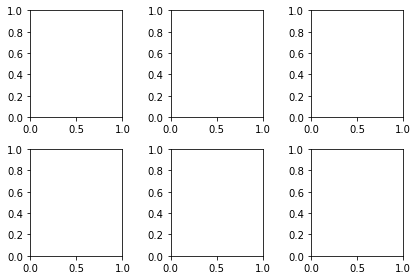

In [4]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 3)
fig.tight_layout()

ax[0, 0].hist(seattle_raw_review["review_scores_value"]) #row=0, col=0
ax[0, 0].set_title('Value')
ax[1, 0].hist(seattle_raw_review["review_scores_checkin"]) #row=1, col=0
ax[1, 0].set_title('Check In')
ax[0, 1].hist(seattle_raw_review["review_scores_cleanliness"]) #row=0, col=1
ax[0, 1].set_title('Cleanliness')
ax[1, 1].hist(seattle_raw_review["review_scores_communication"]) #row=1, col=1
ax[1, 1].set_title('Communication')
ax[1, 2].hist(seattle_raw_review["review_scores_location"]) #row=1, col=2
ax[1 ,2].set_title('Location')
plt.show()

### What are customers mostly saying


We have checked that most customers have a great experience during the stay. 

In all aspects, the scores was pretty high.

It's interesting to also look at the most frequent words from the comments.

### Fill Missing Reviews as Blank

In [ ]:
#count missing values
concat_review_df['comments'].isnull().sum()

There are 339 rows that have missing values and we fill it with blanks.

If we did not perform Missing Value Treatment (MVT), performing word count will occur error.

It's safe to fill it with blanks, since customer did not leave review about their stay.

In [ ]:
import itertools
import collections

def convert(lst): 
    return ([i for item in lst for i in item.lower().split()]) 

all_words_review = convert(concat_review_df['comments'].fillna("")) #Fill in missing reviews with blank


The texts also lowered to avoid overlapping words that have similar intention.

Then, split each word to count their frequency

### Word Frequency

In [ ]:
count_word = collections.Counter(all_words_review) #Count word frequency

clean_word_count = pd.DataFrame(count_word.most_common(5),
                             columns=['words', 'count'])

clean_word_count.head()

The word frequency runs well, but we cannot understand what these words mean.

We wouldn't want these words showed up and we can remove them with `nltk` library

# Removing Stopwords

Stopwords are common in any language.

But we should remove them when analyzing text data, as this doesn't add much value for our analysis

In [ ]:
import nltk
from nltk.corpus import stopwords

In [ ]:
stop_words = set(stopwords.words(['dutch','english']))

# View a few words from the set
list(stop_words)[0:10]

Here's some examples of english and dutch stopwords and we'll remove them 

In [ ]:
words_review_cleaned = [word for word in all_words_review if word not in stop_words]
words_review_count = collections.Counter(words_review_cleaned)

word_review_count_df = pd.DataFrame(words_review_count.most_common(15),
                             columns=['words', 'count'])

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
word_review_count_df.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="purple")

ax.set_title("Most Frequent Words (All Review)")

plt.show()

Notice that the result improved by producing more meaningful words

As the rating suggests, most review expresses positive service.

Some of the aspects was mentionted, such as  _"Great"_  , _"Location"_ , _"Recommend"_ , _"Clean"_ , _"Close"_


# Sentiment Analysis to detect good/bad Reviews

Sentiment analysis is the process of identifying people's attitude and emotional states from a language.

In the application, it able to classify good/bad reviews.

It is a technique uses for natural language processing to interpret and classify emotions.

The output would summarize the positive, negative, or neutral sentiment of these reviews.

Since sentiment analysis is a [complex subject](http://www.360doc.com/content/16/0426/18/2459_554012119.shtml) , the accuracy may not be perfect.

But it's easier for us to find a bad review using this approach when there's a lot of data

We will be using `nltk` from python to analyze the data

In [ ]:
# Snippet from :
# https://www.kaggle.com/residentmario/sentiment-analysis-and-collocation-of-reviews

from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
for sentence in concat_review_df['comments'].values[1:3]:
    print(sentence)
    ss = sid.polarity_scores(sentence)
    for k in sorted(ss):
        print('{0}: {1}, '.format(k, ss[k]), end='')
    print()

Let's look at some of the comment example, and how `nltk` determines a review

`compound` is the normalized weighted score.

The metric is useful when determining a uni-dimensional sentiment over a sentence.

A positive or negative sentiment being +1 as the most positive and -1 as the most negative

The `pos`, `neu`, and `neg` scores are ratios for proportions of text that fall in each category (the values will add up to 1 if summed) . These metrics are useful if we want a multi-dimensional sentiment over a sentence.


More about the [scoring](https://github.com/cjhutto/vaderSentiment)

In [ ]:
from nltk.corpus import stopwords   # stopwords to detect language
from nltk import wordpunct_tokenize # function to split up our words

def get_language_likelihood(input_text):
    """Return a dictionary of languages and their likelihood of being the 
    natural language of the input text
    """
 
    input_text = input_text.lower()
    input_words = wordpunct_tokenize(input_text)
 
    language_likelihood = {}
    total_matches = 0
    for language in stopwords._fileids:
        language_likelihood[language] = len(set(input_words) &
                set(stopwords.words(language)))
 
    return language_likelihood
 
def get_language(input_text):
    """Return the most likely language of the given text
    """ 
    likelihoods = get_language_likelihood(input_text)
    return sorted(likelihoods, key=likelihoods.get, reverse=True)[0]

reviews_f = [r for r in concat_review_df['comments'] if pd.notnull(r) and get_language(r) in ['dutch','english']]

pscores = [sid.polarity_scores(comment) for comment in reviews_f]

After taking all sentiment scores from the comments,

Let's take a look at the distributions

##### Compound Scores

In [ ]:
#Histogram plot neutral
pd.Series([score['compound'] for score in pscores]).plot(kind='hist')

plt.title('Compound Scores')
plt.xlabel('Scores')
plt.ylabel('frequency')

##### Neutral Scores

In [ ]:
#Histogram plot neutral
pd.Series([score['neu'] for score in pscores]).plot(kind='hist')

plt.title('Neutral Scores')
plt.xlabel('Scores')
plt.ylabel('frequency')

##### Positive Scores

In [ ]:
#Histogram plot positive
pd.Series([score['pos'] for score in pscores]).plot(kind='hist')

plt.title('Positive Scores')
plt.xlabel('Scores')
plt.ylabel('frequency')

##### Negative Scores

Surprisingly, the negative scores was mostly zero.

This implies that indeed the experience was pleasant for most Airbnb stay.

In [ ]:
#Histogram plot negative
pd.Series([score['neg'] for score in pscores]).plot(kind='hist', bins=100)

plt.title('Negative Scores')
plt.xlabel('Scores')
plt.ylabel('frequency')

In [ ]:
#Create dataframe for sentiment analysis
scored_reviews = pd.DataFrame()
scored_reviews['review'] = [r for r in reviews_f if get_language(r) in ['dutch','english']]
scored_reviews['compound'] = [score['compound'] for score in pscores]
scored_reviews['negativity'] = [score['neg'] for score in pscores]
scored_reviews['neutrality'] = [score['neu'] for score in pscores]
scored_reviews['positivity'] = [score['pos'] for score in pscores]

#### Inspecting Bad review

In [ ]:
130700/len(scored_reviews)

In [ ]:
scored_reviews.query('positivity > 0')

n =500376; (96,5% users)

Not all review is positive, some have a negative compound that expresses an unpleasant stay.

In [ ]:
scored_reviews.query('negativity > 0')

n =130700; (25% users)

Also, some of the negative scores were not bad at all. Row 517987 has a high compound score, and the review seems positive.

In [ ]:
scored_reviews.query('negativity > positivity')

In [ ]:
scored_reviews.iloc[517953]['review']

Compund: 0.1883, Pos: 0.061, Neu: 0.852 , Neg: 0.08 (n=6276, 1,2%  of all)

If we closely read the review, It strongly influences readers to not recommend the place. But, sentiment scores tend to be neutral with a slight difference between positive & negative. 

The compound score has a better explanation as the score is closer to zero.

Notice that only a small fraction of reviews affected (1,2% of all).

In [ ]:
scored_reviews.query('negativity > positivity').query('compound > 0.2')

In [ ]:
scored_reviews.iloc[500214]['review']

Compound: 0.2667, Pos: 0.416, Neu: 0.288 , Neg: 0.416 (n=135, 0,02% of all)

It's not accurate to score this review as negative, as there is no bad comment about it.

Started out as a positive review, the follow up sentence was mostly negative.

This was accurate, being positivity (0.083) is lower than negativity (0.209) metric.

In [ ]:
scored_reviews.iloc[517895]

In [ ]:
scored_reviews.iloc[517895]['review']

The compound metric itself may not all accurate. It detects the sentence as bad

if we translate this,it basically saying that the location of the stay was good with helpful staff.

Thus , we should also look into negativity and neutrality to justify bad review



In [ ]:
scored_reviews.query('negativity > positivity').query('compound < -0.8')

In [ ]:
scored_reviews.iloc[516995]['review']

We found a dutch review with the unpleasant comment saying that the place was not good for a long stay
But, the threshold was too strict to find these negative comments.
The tradeoff is that we may find only a small fraction of review

#### Overall Sentiment performance was good

We have looked at some extreme cases where there's a lack of accuracy in the score. But, NLTK's general performance to classify the review was great. Utilizing the compound score, most sentiment classifies well. 
Next, if we wanted to look at the performance consistency, another dataset that has a mixed review should be tested.

## Summary & Future Work

- Airbnb has a pleasant experience when using the service, the ratings were ±90%
- Reviews have missing values and treated with filling in blanks
- Data cleaning with removing stopwords is essential to find the most frequent word
- NLTK able to classify the sentiment category well enough. But, sometimes would need human assistance to improve its accuracy in a fraction of cases
- Business should take action for the bad review from the negative score and reading customers' complaints. 
- For future research, we need to compare other datasets that have mixed reviews.

## References 

- [earthdatascience](https://www.earthdatascience.org/courses/use-data-open-source-python/intro-to-apis/calculate-tweet-word-frequencies-in-python/)
- [360doc](http://www.360doc.com/content/16/0426/18/2459_554012119.shtml)
- [Kaggle](https://www.kaggle.com/residentmario/sentiment-analysis-and-collocation-of-reviews)
- [Soundwave](https://soundwave.co.uk/blog/study-finds-67-of-consumers-are-influenced-by-online-reviews)